# ------------------------------> Capstone Project - MIT <------------------------------

# A) Problem Statement 1:

> An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

# B) Project Objective

**1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.**

**2. Segment the customers based on their purchasing behavior.**

# C) Data Description

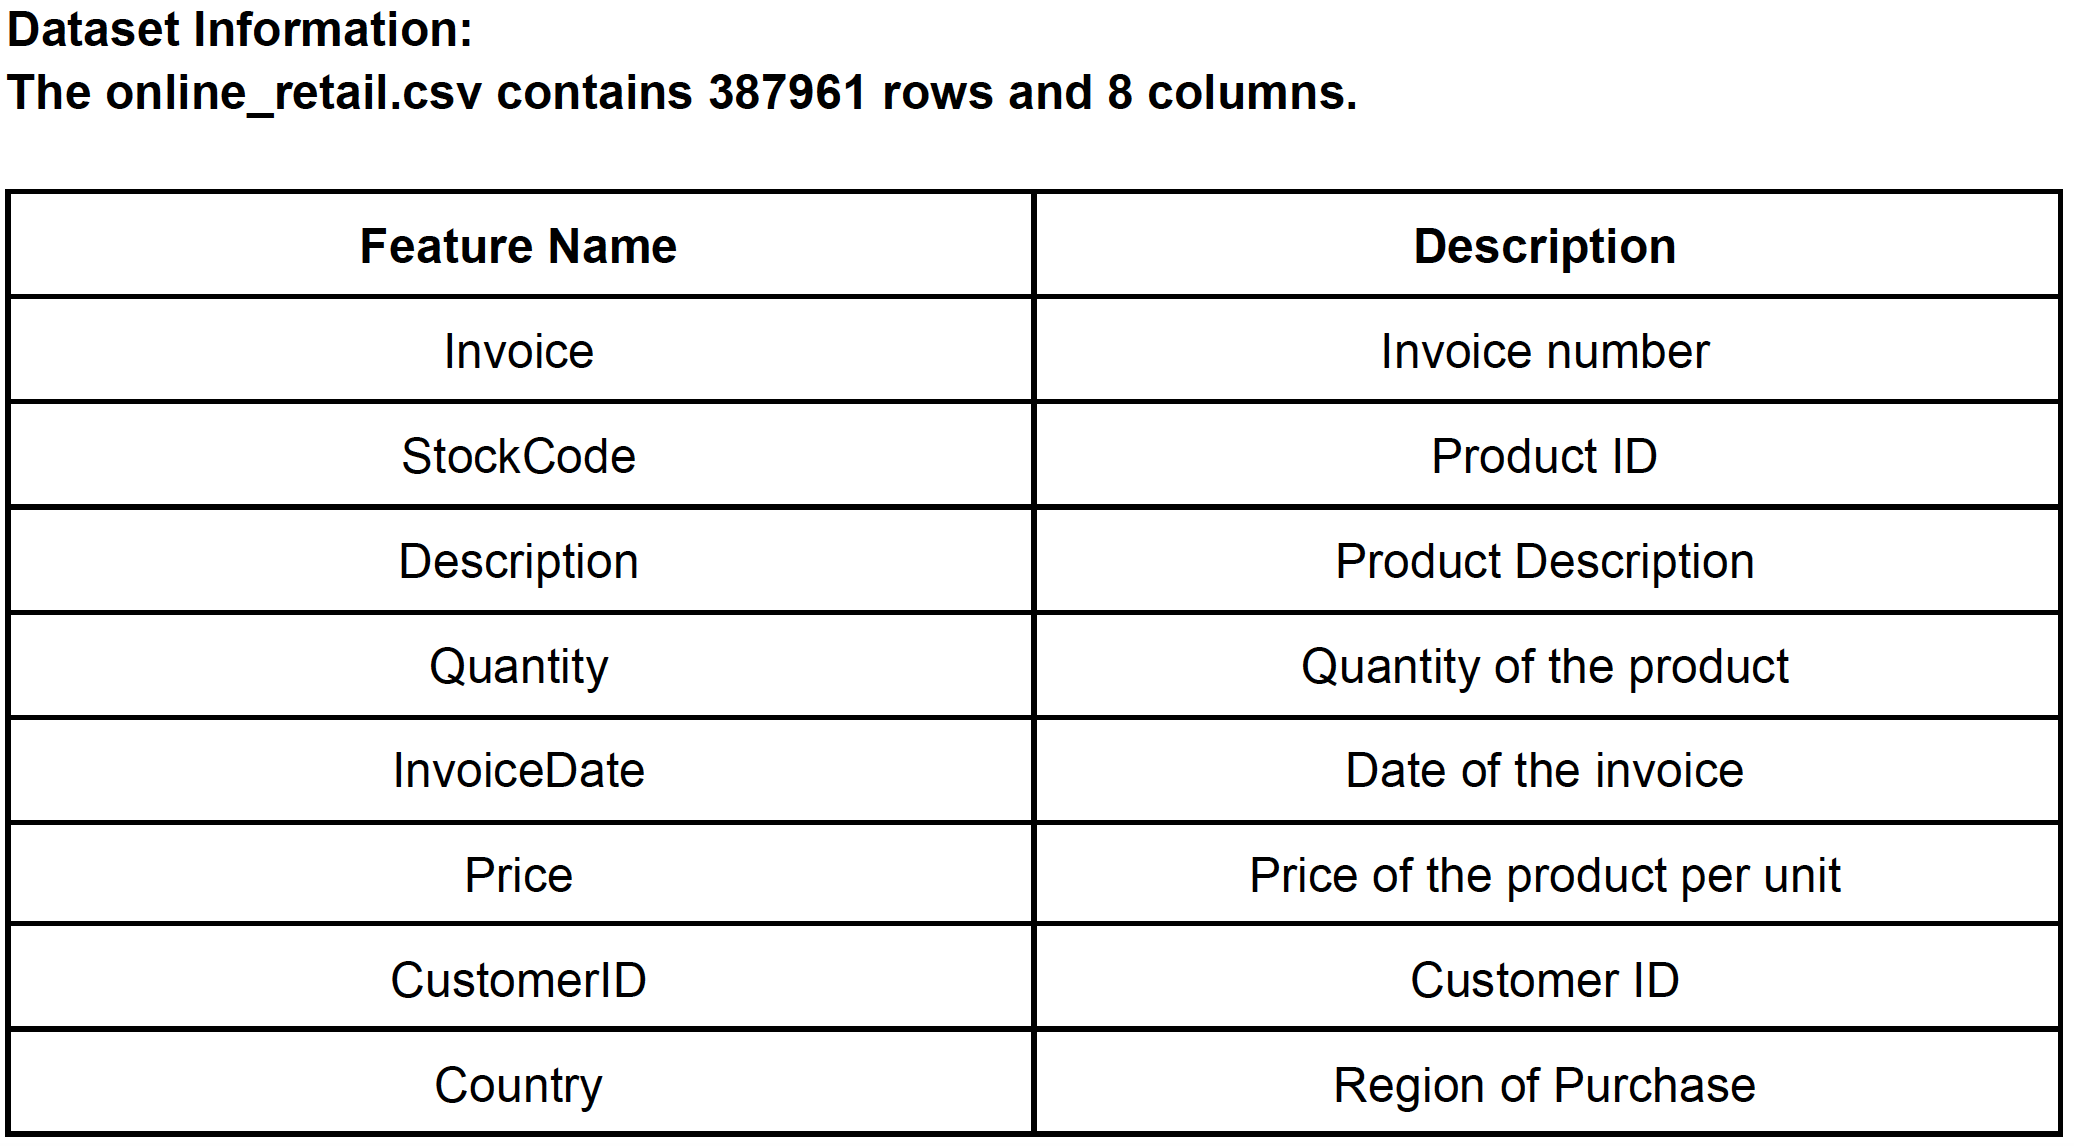

In [42]:
#Importing the Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [43]:
retail = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
retail.shape

(541909, 8)

In [45]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [46]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2 : Data Cleaning

In [47]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [48]:
round((retail.isna().sum()/retail.shape[0] * 100),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [49]:
round((retail.isna().mean() *100 ))

InvoiceNo       0.0
StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     25.0
Country         0.0
dtype: float64

In [50]:
retail = retail.dropna()
retail.shape

(406829, 8)

In [51]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [52]:
retail.loc[:,'CustomerID'] = retail.loc[:,'CustomerID'].astype(str)
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

# Step 3 : Data preparation

* R (Recency): Number of days since last purchase of customer. 
* F (Frequency): Number of transactions of customers. 
* M (Monetary): Total amount of transactions (revenue contributed by each customer).

In [53]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [54]:
retail['Amount'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [55]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [56]:
m = pd.DataFrame(rfm_m)
m.reset_index(inplace=True)
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [57]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [58]:
retail[retail['CustomerID'] == '12347.0']['InvoiceNo'].unique()

array(['537626', '542237', '549222', '556201', '562032', '573511',
       '581180'], dtype=object)

In [59]:
len(retail[retail['CustomerID'] == '12347.0']['InvoiceNo'].unique())

7

In [60]:
retail.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [61]:
rfm_f = retail.groupby(['CustomerID', 'InvoiceNo']).size().groupby(level=0).count()
rfm_f

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Length: 4372, dtype: int64

In [62]:
f = pd.DataFrame(rfm_f)
f.reset_index(inplace=True)
f.head()

,CustomerID,0
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [63]:
f.columns = ['CustomerID', 'Frequency']
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [64]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%m/%d/%Y %H:%M' )
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [65]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [66]:
retail['diff']  = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [67]:
rfm_r = retail.groupby('CustomerID')['diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [68]:
rfm_r['diff'] = rfm_r['diff'].dt.days
rfm_r.columns = ['CustomerID','Recency']
rfm_r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [69]:
rfm2 = pd.merge(m,f, on='CustomerID', how = 'inner')
rfm2

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4367,18280.0,180.60,1
4368,18281.0,80.82,1
4369,18282.0,176.60,3
4370,18283.0,2094.88,16


In [70]:
rfm = pd.merge(rfm2,rfm_r, on='CustomerID', how = 'inner')
# rfm.columns = ['Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


# Step 4 : Outliers Analysis

Text(0, 0.5, 'Attributes')

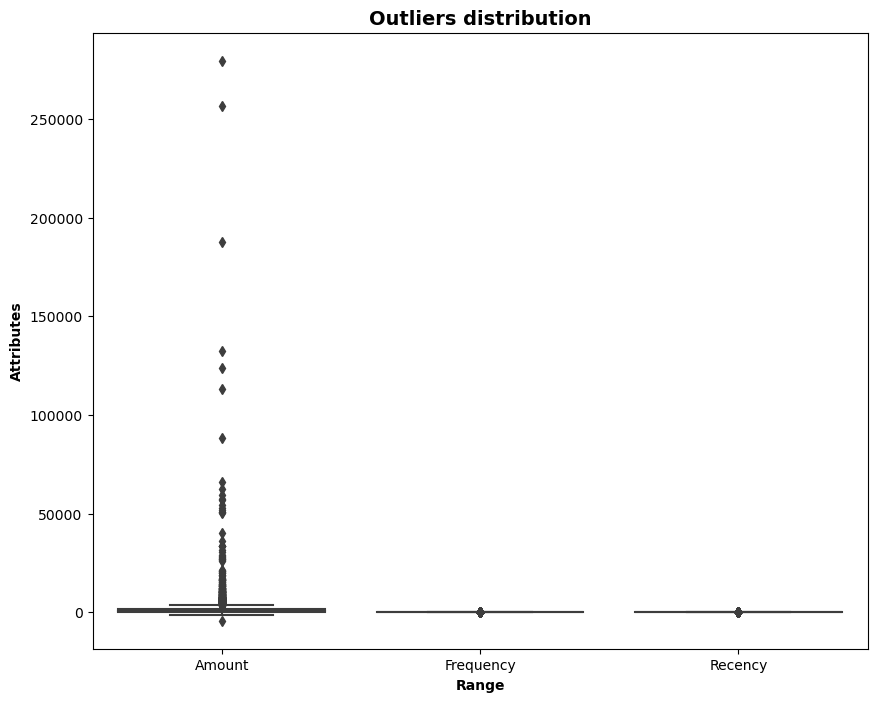

In [71]:
attributes = ['Amount','Frequency','Recency']
plt.figure(figsize = (10,8))

sns.boxplot(data= rfm[attributes])

plt.title('Outliers distribution', fontsize=14, fontweight='bold')
plt.xlabel('Range', fontweight='bold') 
plt.ylabel('Attributes', fontweight='bold') 

In [72]:
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1

In [73]:
Q1


293.3625

In [74]:
Q3

1611.725

In [75]:
IQR

1318.3625

In [76]:
Q3 + 1.5 * IQR

3589.2687499999997

In [77]:
Q1 - 1.5 * IQR

-1684.1812499999999

In [78]:
rfm = rfm[(rfm.Amount >= Q1 - 1.5 * IQR) & (rfm.Amount <= Q3 + 1.5 * IQR) ]

rQ1 = rfm.Recency.quantile(0.25)
rQ3 = rfm.Recency.quantile(0.75)
rIQR = rQ3 - rQ1
rfm = rfm[(rfm.Recency >= rQ1 - 1.5 * rIQR) & (rfm.Recency <= rQ3 + 1.5 * rIQR) ]

fQ1 = rfm.Frequency.quantile(0.25)
fQ3 = rfm.Frequency.quantile(0.75)
fIQR = fQ3 - fQ1
rfm = rfm[(rfm.Frequency >= fQ1 - 1.5 * fIQR) & (rfm.Frequency <= fQ3 + 1.5 * fIQR) ]

In [79]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
5,12352.0,1545.41,11,35


In [80]:
rfm.shape

(3748, 4)

In [81]:
rfm_df = rfm[['Amount','Frequency','Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.06876489, -0.45957654,  2.38988146],
       [ 1.28711967,  0.37678805, -0.21912967],
       [ 1.23509264, -0.87775884, -0.8012198 ],
       ...,
       [-0.96282323, -0.87775884,  0.8826838 ],
       [-0.83727149, -0.04139425, -0.91555893],
       [ 1.33960549, -0.04139425, -0.5517526 ]])

In [82]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.068765,-0.459577,2.389881
1,1.287120,0.376788,-0.219130
2,1.235093,-0.877759,-0.801220
3,-0.630422,-0.877759,2.223570
4,0.957012,3.304064,-0.624514


In [85]:
rfm_1 = retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (retail['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'Amount': 'sum'
})

In [87]:
# Create RFM scores
rfm_1['R'] = pd.qcut(rfm_1['InvoiceDate'], 4, labels=[4, 3, 2, 1])
rfm_1['F'] = pd.qcut(rfm_1['InvoiceNo'], 4, labels=[1, 2, 3, 4])
rfm_1['M'] = pd.qcut(rfm_1['Amount'], 4, labels=[1, 2, 3, 4])

# Create customer segments based on RFM scores
def create_segment(r, f, m):
    if r == 4 and f == 4 and m == 4:
        return 'Platinum'
    elif r == 4 and f == 4:
        return 'Gold'
    elif r == 4 and m == 4:
        return 'Silver'
    elif f == 4 and m == 4:
        return 'Bronze'
    else:
        return 'Basic'

rfm_1['Segment'] = rfm_1.apply(lambda x: create_segment(x['R'], x['F'], x['M']), axis=1)


In [88]:
rfm_1

,InvoiceDate,InvoiceNo,Amount,R,F,M,Segment
CustomerID,,,,,,,
12346.0,325,2,0.00,1,1,1,Basic
12347.0,1,182,4310.00,4,4,4,Platinum
12348.0,74,31,1797.24,2,2,4,Basic
12349.0,18,73,1757.55,3,3,4,Basic
12350.0,309,17,334.40,1,1,2,Basic
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,Basic
18281.0,180,7,80.82,1,1,1,Basic
18282.0,7,13,176.60,4,1,1,Basic


In [89]:
rfm_1['Segment'].value_counts()

Basic       3376
Platinum     471
Bronze       329
Silver        99
Gold          97
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

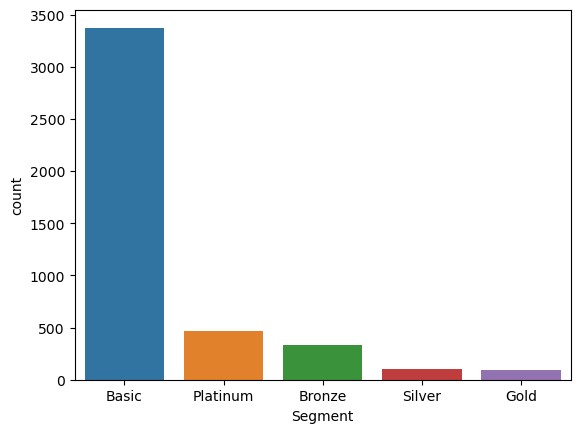

In [93]:
sns.countplot(rfm_1['Segment'])

# Model Building

In [94]:
ssd = []
range_cluster = [2,3,4,5,6,7,8]
for n in range_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
ssd

[6148.602600913298,
 3635.1821742662905,
 2856.2343491442025,
 2472.3013854765836,
 2146.710993631315,
 1877.6347852696076,
 1706.9740048115473]

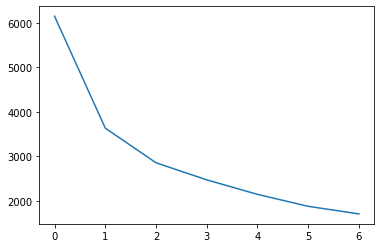

In [95]:
plt.plot(ssd)

In [96]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [97]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 1], dtype=int32)

In [98]:
rfm['Clusterid'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Clusterid
0,12346.0,0.00,2,325,0
2,12348.0,1797.24,4,74,1
3,12349.0,1757.55,1,18,2
4,12350.0,334.40,1,309,0
5,12352.0,1545.41,11,35,1


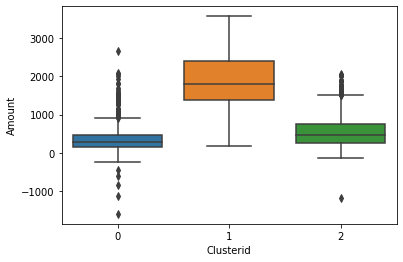

In [99]:
sns.boxplot(x = 'Clusterid', y = 'Amount', data=rfm)

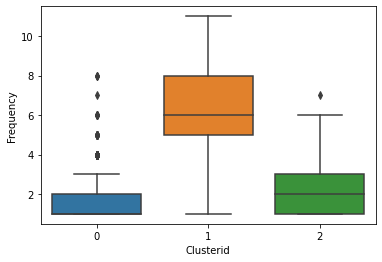

In [100]:
sns.boxplot(x = 'Clusterid', y = 'Frequency', data=rfm)

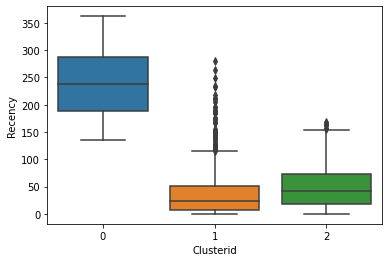

In [101]:
sns.boxplot(x = 'Clusterid', y = 'Recency', data=rfm)

In [102]:
rfm[rfm['Clusterid']  == 0]

,CustomerID,Amount,Frequency,Recency,Clusterid
0,12346.0,0.00,2,325,0
4,12350.0,334.40,1,309,0
6,12353.0,89.00,1,203,0
7,12354.0,1079.40,1,231,0
8,12355.0,459.40,1,213,0
...,...,...,...,...,...
4350,18256.0,-50.10,1,354,0
4355,18262.0,149.48,1,139,0
4359,18269.0,138.90,2,357,0
4367,18280.0,180.60,1,277,0


# Conclusions

* People belongs to 1st cluster spent more than other
* People belongs to 1st cluster visits more frequnetly than others followed by cluster 2
* People belongs to 3rd cluster are most recent customers